This notebook will document the creation of a population pyramid for England and Wales using publicly available data from the 2021 census 

In [303]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

df = pd.read_excel('census2021firstresultsenglandwales1.xlsx', 'P03', skiprows=7, usecols='B,D:AO')
df

#importing the required columns of the dataset and printing it to assess how it looks 


,Area name,Females:\nAged 4 years and under\n[note 12],Females:\nAged 5 to 9 years\n[note 12],Females:\nAged 10 to 14 years\n[note 12],Females:\nAged 15 to 19 years\n[note 12],Females:\nAged 20 to 24 years\n[note 12],Females:\nAged 25 to 29 years\n[note 12],Females:\nAged 30 to 34 years\n[note 12],Females:\nAged 35 to 39 years\n[note 12],Females:\nAged 40 to 44 years\n[note 12],...,Males:\nAged 45 to 49 years\n[note 12],Males:\nAged 50 to 54 years\n[note 12],Males:\nAged 55 to 59 years\n[note 12],Males:\nAged 60 to 64 years\n[note 12],Males:\nAged 65 to 69 years\n[note 12],Males:\nAged 70 to 74 years\n[note 12],Males:\nAged 75 to 79 years\n[note 12],Males:\nAged 80 to 84 years\n[note 12],Males:\nAged 85 to 89 years\n[note 12],Males:\nAged 90 years and over\n[note 12]
0,England and Wales,1577300,1720400,1753100,1653100,1793300,1991900,2145200,2049400,1916200,...,1867900,2027500,1978300,1699600,1428200,1419500,1008900,668200,372700,169200
1,England,1501600,1634400,1664100,1568100,1701500,1897400,2044400,1953500,1826700,...,1777100,1922800,1869600,1602000,1341900,1331800,947200,628600,351400,159800
2,North East,65600,73000,75300,73600,80500,81800,87100,84000,77800,...,77800,89600,94100,85600,74200,71100,47300,31800,17100,7100
3,County Durham,12000,13800,14400,15300,16400,15000,16000,15800,15100,...,15400,18600,19500,17200,15400,14800,10300,6700,3400,1400
4,Darlington,2700,3000,3300,2800,2800,3300,3600,3400,3300,...,3300,3800,3900,3400,3000,2800,2000,1400,800,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,Caerphilly,4600,5100,5300,4500,4400,5600,6000,5900,5500,...,5400,6200,6300,5400,4700,4800,3300,2100,1000,400
371,Blaenau Gwent,1700,1800,1900,1600,1800,2300,2400,2000,1900,...,2100,2400,2600,2100,1900,1900,1300,800,400,100
372,Torfaen,2400,2600,2700,2300,2300,3000,3300,2900,2700,...,2600,3100,3300,2900,2500,2500,1800,1100,600,300
373,Monmouthshire,1900,2200,2500,2200,1800,2200,2400,2600,2600,...,2800,3500,3800,3300,3000,3100,2300,1500,900,400


In [304]:
popdata = df.head(1)
popdata

#in this case, only the top row is needed as it contains the required data 

,Area name,Females:\nAged 4 years and under\n[note 12],Females:\nAged 5 to 9 years\n[note 12],Females:\nAged 10 to 14 years\n[note 12],Females:\nAged 15 to 19 years\n[note 12],Females:\nAged 20 to 24 years\n[note 12],Females:\nAged 25 to 29 years\n[note 12],Females:\nAged 30 to 34 years\n[note 12],Females:\nAged 35 to 39 years\n[note 12],Females:\nAged 40 to 44 years\n[note 12],...,Males:\nAged 45 to 49 years\n[note 12],Males:\nAged 50 to 54 years\n[note 12],Males:\nAged 55 to 59 years\n[note 12],Males:\nAged 60 to 64 years\n[note 12],Males:\nAged 65 to 69 years\n[note 12],Males:\nAged 70 to 74 years\n[note 12],Males:\nAged 75 to 79 years\n[note 12],Males:\nAged 80 to 84 years\n[note 12],Males:\nAged 85 to 89 years\n[note 12],Males:\nAged 90 years and over\n[note 12]
0,England and Wales,1577300,1720400,1753100,1653100,1793300,1991900,2145200,2049400,1916200,...,1867900,2027500,1978300,1699600,1428200,1419500,1008900,668200,372700,169200


In [305]:
popdata_transposed = popdata.T
popdata_transposed
new_header = popdata_transposed.iloc[0] 
popdata_transposed = popdata_transposed[1:] 
popdata_transposed.columns = new_header


popdata_transposed = popdata_transposed.reset_index()
popdata_transposed = popdata_transposed.rename(columns={'index': 'Group', 'England and Wales': 'Population'})

popdata_transposed = popdata_transposed.rename_axis(None, axis=1)

popdata_transposed

female_data = popdata_transposed[popdata_transposed['Group'].str.contains('Females')]
male_data = popdata_transposed[popdata_transposed['Group'].str.contains('Males')]

female_data, male_data

#transposing the row and splitting it up into two datasets (male and female)

(                                          Group Population
 0   Females:\nAged 4 years and under\n[note 12]    1577300
 1        Females:\nAged 5 to 9 years\n[note 12]    1720400
 2      Females:\nAged 10 to 14 years\n[note 12]    1753100
 3      Females:\nAged 15 to 19 years\n[note 12]    1653100
 4      Females:\nAged 20 to 24 years\n[note 12]    1793300
 5      Females:\nAged 25 to 29 years\n[note 12]    1991900
 6      Females:\nAged 30 to 34 years\n[note 12]    2145200
 7      Females:\nAged 35 to 39 years\n[note 12]    2049400
 8      Females:\nAged 40 to 44 years\n[note 12]    1916200
 9      Females:\nAged 45 to 49 years\n[note 12]    1920800
 10     Females:\nAged 50 to 54 years\n[note 12]    2095900
 11     Females:\nAged 55 to 59 years\n[note 12]    2050800
 12     Females:\nAged 60 to 64 years\n[note 12]    1756100
 13     Females:\nAged 65 to 69 years\n[note 12]    1516900
 14     Females:\nAged 70 to 74 years\n[note 12]    1558500
 15     Females:\nAged 75 to 79 years\n[

In [306]:
female_data.loc[:, 'Group'] = female_data.loc[:, 'Group'].str.replace('Females:\nAged','').str.replace('\n[note 12]',' ')
male_data.loc[:, 'Group'] = male_data.loc[:, 'Group'].str.replace('Males:\nAged','').str.replace('\n[note 12]',' ')

female_data, male_data

#cleaning up the category labels 

(                  Group Population
 0    4 years and under     1577300
 1         5 to 9 years     1720400
 2       10 to 14 years     1753100
 3       15 to 19 years     1653100
 4       20 to 24 years     1793300
 5       25 to 29 years     1991900
 6       30 to 34 years     2145200
 7       35 to 39 years     2049400
 8       40 to 44 years     1916200
 9       45 to 49 years     1920800
 10      50 to 54 years     2095900
 11      55 to 59 years     2050800
 12      60 to 64 years     1756100
 13      65 to 69 years     1516900
 14      70 to 74 years     1558500
 15      75 to 79 years     1161400
 16      80 to 84 years      848800
 17      85 to 89 years      552400
 18   90 years and over      358700,
                   Group Population
 19   4 years and under     1654800
 20        5 to 9 years     1804200
 21      10 to 14 years     1842800
 22      15 to 19 years     1741500
 23      20 to 24 years     1808800
 24      25 to 29 years     1909900
 25      30 to 34 years    

([<matplotlib.axis.XTick at 0x110179670>,
 [Text(-2000000, 0, '2,000,000'),
  Text(-1000000, 0, '1,000,000'),
  Text(0, 0, '0'),
  Text(1000000, 0, '1,000,000'),
  Text(2000000, 0, '2,000,000')])

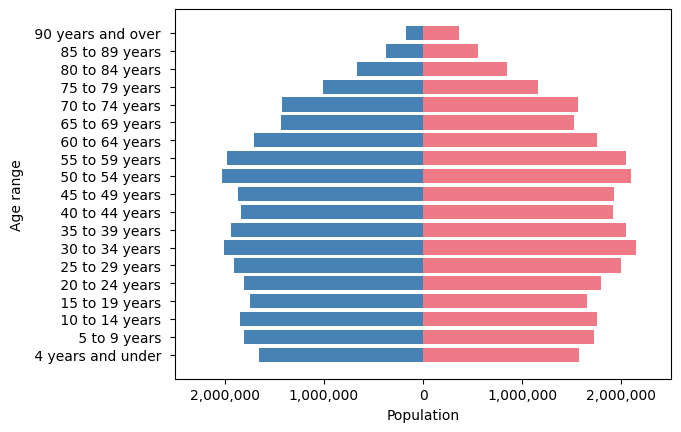

In [307]:
plt.barh(y = female_data['Group'], width = female_data['Population'], color = '#ee7a87')
plt.barh(y = female_data['Group'], width = male_data['Population'], left = -male_data['Population'], color = '#4682b4')
plt.xlabel('Population')
plt.ylabel('Age range')
plt.xlim(xmin=-2500000, xmax = 2500000)
plt.xticks(ticks=[-2000000, -1000000, 0, 1000000, 2000000],
labels=['2,000,000', '1,000,000', '0', '1,000,000', '2,000,000'])

#creating the plot, with male data in blue, and female in pink 